In [2]:
import pandas as pd
pt = pd.read_csv('prod_type.csv')
ob = pd.read_csv('online_behavior.csv')
dg = pd.read_csv('demographic.csv')
ti = pd.read_csv('trans_info.csv')

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
ob

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,tot_pag_view_ct,tot_sess_hr_v,trfc_src,dvc_ctg_nm
0,7809,1,8,5,A03,20190913,01:16,2571103,NaN,NaN,34.0,2663.0,DIRECT,NaN
1,7809,1,4,2,A03,20190913,01:14,2485909,NaN,NaN,34.0,2663.0,DIRECT,NaN
2,7809,1,11,5,A03,20190913,01:17,2646597,NaN,NaN,34.0,2663.0,DIRECT,NaN
3,7809,1,1,2,A03,20190913,00:46,788304,NaN,NaN,34.0,2663.0,DIRECT,NaN
4,7809,1,9,5,A03,20190913,01:17,2617609,NaN,NaN,34.0,2663.0,DIRECT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3196357,31040,1,1,0,A02,20190815,03:47,13525,NaN,다이슨 에어랩,4.0,62.0,unknown,mobile_web
3196358,4129,1,2,0,A02,20190721,01:22,250099,NaN,여성메탈시계,3.0,250.0,unknown,mobile_web
3196359,4129,1,1,0,A02,20190721,01:18,1525,NaN,여성메탈시계,3.0,250.0,unknown,mobile_web
3196360,54403,3,1,0,A02,20190731,20:14,16905,NaN,비비고왕교자,3.0,68.0,unknown,mobile_app


In [27]:
ob_3000 = ob.iloc[0:5000,:]

In [60]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,8))
ob_3000.plot(kind='scatter', x = 'clnt_id', y = 'action_type')
plt.show()

NameError: name 'ob_3000' is not defined

<Figure size 2160x576 with 0 Axes>

In [44]:
dg = dg[dg['clnt_age'] !='unknown']
dg
dg.plot(kind='bar',x='clnt_id',y='clnt_age')

TypeError: no numeric data to plot

In [36]:
dg

,clnt_id,clnt_gender,clnt_age
0,1,unknown,unknown
1,2,F,30
2,3,unknown,unknown
3,4,unknown,unknown
4,5,unknown,unknown
...,...,...,...
72394,72425,unknown,unknown
72395,72426,unknown,unknown
72396,72427,unknown,unknown
72397,72428,unknown,unknown


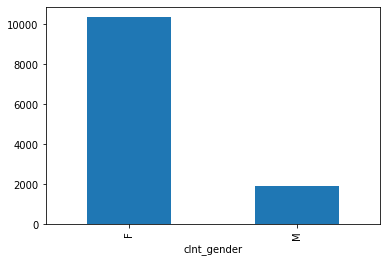

In [47]:
dg.groupby('clnt_gender')['clnt_id'].nunique().plot(kind='bar')

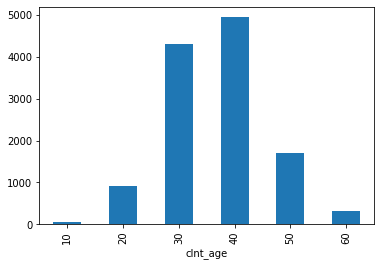

In [48]:
dg.groupby('clnt_age')['clnt_id'].nunique().plot(kind='bar')

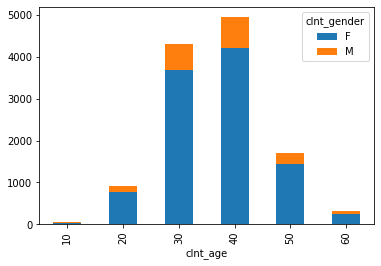

In [50]:
dg.groupby(['clnt_age','clnt_gender']).size().unstack().plot(kind='bar',stacked=True)

In [19]:
ob2 = ob[['clnt_id', 'action_type']]
ob2.loc[ob2['action_type'] > 5, 'purchased'] = 1 
ob2.loc[ob2['action_type'] > 6, 'refund'] = 1
ob2.loc[ob2['action_type'] < 6, 'purchased'] = 0
ob2.loc[ob2['action_type'] < 6, 'refund'] = 0

ob2

,clnt_id,action_type,purchased,refund
0,7809,5,0.0,0.0
1,7809,2,0.0,0.0
2,7809,5,0.0,0.0
3,7809,2,0.0,0.0
4,7809,5,0.0,0.0
...,...,...,...,...
3196357,31040,0,0.0,0.0
3196358,4129,0,0.0,0.0
3196359,4129,0,0.0,0.0
3196360,54403,0,0.0,0.0


In [50]:
purchased_cnt = ob2[ob2.purchased == 1].groupby(['clnt_id', 'purchased']).count()
dg_v1 = pd.merge(dg, purchased_cnt, on='clnt_id', how='left')
dg_v1 = dg_v1.rename({'action_type': 'purchased_cnt'}, axis = 1)
dg_v1 = dg_v1.iloc[:, 0:4]
dg_v1

,clnt_id,clnt_gender,clnt_age,purchased_cnt
0,1,unknown,unknown,NaN
1,2,F,30,4.0
2,3,unknown,unknown,NaN
3,4,unknown,unknown,1.0
4,5,unknown,unknown,NaN
...,...,...,...,...
72394,72425,unknown,unknown,NaN
72395,72426,unknown,unknown,NaN
72396,72427,unknown,unknown,1.0
72397,72428,unknown,unknown,NaN


In [54]:
refund_cnt = ob2[ob2.refund == 1].groupby(['clnt_id', 'refund']).count()
refund_cnt
dg_v2 = pd.merge(dg_v1, refund_cnt, on='clnt_id', how='left')
dg_v2 = dg_v2.rename({'action_type': 'refund_cnt'}, axis = 1)
dg_v2 = dg_v2.iloc[:, 0:5]
dg_v2

,clnt_id,clnt_gender,clnt_age,purchased_cnt,refund_cnt
0,1,unknown,unknown,NaN,NaN
1,2,F,30,4.0,NaN
2,3,unknown,unknown,NaN,NaN
3,4,unknown,unknown,1.0,NaN
4,5,unknown,unknown,NaN,NaN
...,...,...,...,...,...
72394,72425,unknown,unknown,NaN,NaN
72395,72426,unknown,unknown,NaN,NaN
72396,72427,unknown,unknown,1.0,NaN
72397,72428,unknown,unknown,NaN,NaN


In [56]:
dg_v2.to_csv('demographic_cnt.csv')

In [30]:
ob2.groupby(['clnt_id','purchased']).size()

clnt_id  purchased
1        0.0           10
2        0.0          245
         1.0            4
3        0.0           10
4        0.0            1
                     ... 
72426    0.0            8
72427    0.0           25
         1.0            1
72428    0.0            7
72429    0.0            2
Length: 90839, dtype: int64

In [ ]:
df = ob2
df.groupby(['clnt_id-[p[[p---p[]]]]', 'col2']).size().reset_index(name='counts')
df

In [112]:
ob3 = pd.merge(dg, ob2, how='left')
ob3

,clnt_id,clnt_gender,clnt_age,action_type,purchased
0,2,F,30,3,NaN
1,2,F,30,3,NaN
2,2,F,30,5,NaN
3,2,F,30,1,NaN
4,2,F,30,2,NaN
...,...,...,...,...,...
1878535,72424,M,40,0,NaN
1878536,72424,M,40,0,NaN
1878537,72424,M,40,0,NaN
1878538,72424,M,40,0,NaN


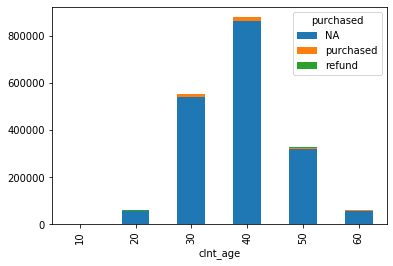

In [105]:
ob3.groupby(['clnt_age', 'purchased']).size().unstack().plot(kind='bar',stacked=True)

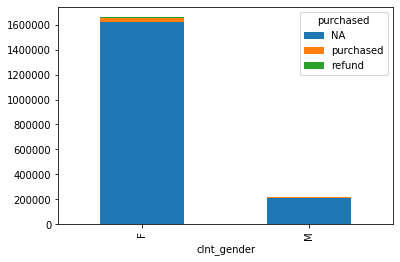

In [106]:
ob3.groupby(['clnt_gender', 'purchased']).size().unstack().plot(kind='bar',stacked=True)

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
dg_v2
corr = dg_v2.corr()
corr.style.background_gradient(cmap='coolwarm')
# ax = sns.heatmap(
#     corr, 
#     vmin=-1, vmax=1, center=0,
#     cmap=sns.diverging_palette(20, 220, n=200),
#     square=True
# )
# ax.set_xticklabels(
#     ax.get_xticklabels(),
#     rotation=45,
#     horizontalalignment='right'
# );

,clnt_id,clnt_gender,purchased_cnt,refund_cnt
clnt_id,1,-0.00301508,0.0106244,-0.0100497
clnt_gender,-0.00301508,1,-0.0520525,-0.0726062
purchased_cnt,0.0106244,-0.0520525,1,0.71114
refund_cnt,-0.0100497,-0.0726062,0.71114,1


In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = ob.corr()
corr.style.background_gradient(cmap='coolwarm')

,clnt_id,sess_id,hit_seq,action_type,sess_dt,hit_pss_tm,trans_id,tot_pag_view_ct,tot_sess_hr_v
clnt_id,1,0.048524,0.0270513,0.0482887,-0.00100466,0.00953099,0.00846448,-0.0595959,0.0117388
sess_id,0.048524,1,0.00933792,0.0252705,0.302776,0.029889,0.284483,0.0414094,0.035703
hit_seq,0.0270513,0.00933792,1,0.158638,-0.00433649,0.683302,0.00609968,0.510106,0.505438
action_type,0.0482887,0.0252705,0.158638,1,0.00922834,0.0974431,0.00463989,-0.0547857,0.0430834
sess_dt,-0.00100466,0.302776,-0.00433649,0.00922834,1,-0.000635691,0.97284,0.00196649,-0.000978786
hit_pss_tm,0.00953099,0.029889,0.683302,0.0974431,-0.000635691,1,0.00461995,0.47757,0.753409
trans_id,0.00846448,0.284483,0.00609968,0.00463989,0.97284,0.00461995,1,0.00211806,0.00676195
tot_pag_view_ct,-0.0595959,0.0414094,0.510106,-0.0547857,0.00196649,0.47757,0.00211806,1,0.625892
tot_sess_hr_v,0.0117388,0.035703,0.505438,0.0430834,-0.000978786,0.753409,0.00676195,0.625892,1


In [85]:
# 성별 처리
dg_v2['clnt_gender'].replace([2], ['unknown'], inplace=True)
dg_v2

,clnt_id,clnt_gender,clnt_age,purchased_cnt,refund_cnt
1,2,0,30,4.0,NaN
8,9,0,40,2.0,NaN
11,12,0,40,1.0,NaN
19,20,0,30,1.0,NaN
21,22,1,30,1.0,NaN
...,...,...,...,...,...
72342,72373,0,50,5.0,NaN
72369,72400,0,40,3.0,NaN
72379,72410,0,40,1.0,NaN
72392,72423,0,30,1.0,NaN


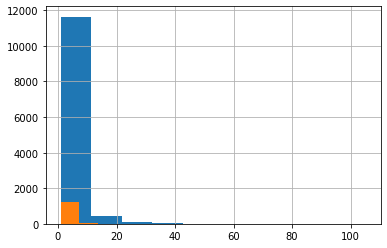

In [91]:
dg_v2.groupby('purchased_cnt').size()
dg_v2['purchased_cnt'].hist(bins=10)
dg_v2['refund_cnt'].hist(bins=10)

In [102]:
ob[ob['action_type'] > 5].groupby('trans_id').size()
ob[ob['action_type'] > 5].trans_id.isnull()

trans_id
38728.0     1
38729.0     1
38730.0     7
38731.0     1
38732.0     1
           ..
112947.0    1
112948.0    1
112949.0    1
112950.0    1
112951.0    1
Length: 50997, dtype: int64